In [3]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
sns.set(style="whitegrid")

from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,train_test_split,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import shap
import lime.lime_tabular
from sklearn.utils.class_weight import compute_class_weight
from fairlearn.metrics import selection_rate
from aif360.sklearn.metrics import disparate_impact_ratio, statistical_parity_difference

In [4]:
df = pd.read_csv("BankChurners.csv")

In [5]:
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [6]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

**There are no Null Values in the dataset.**

In [7]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [8]:
df.shape

(10127, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [10]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [14]:
df.describe(include=['O'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [15]:
df["Attrition_Flag"].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

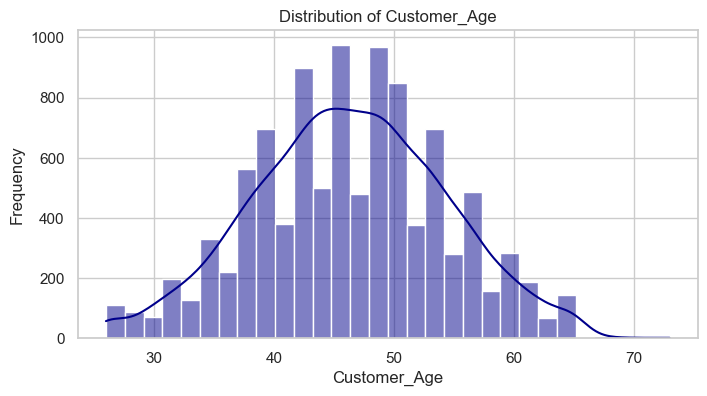

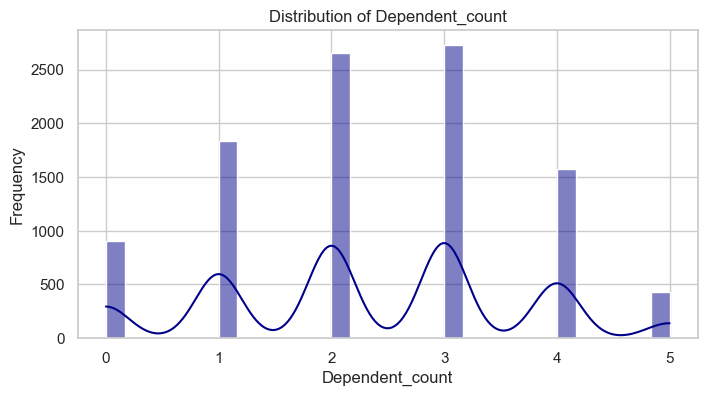

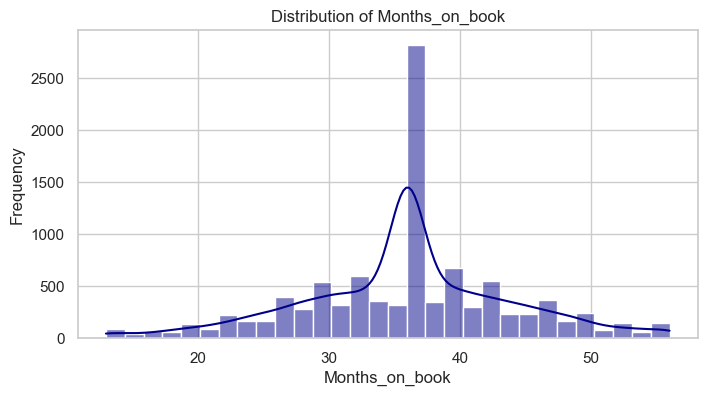

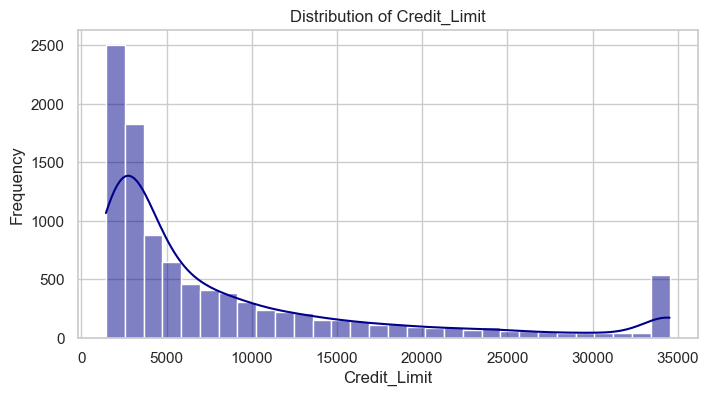

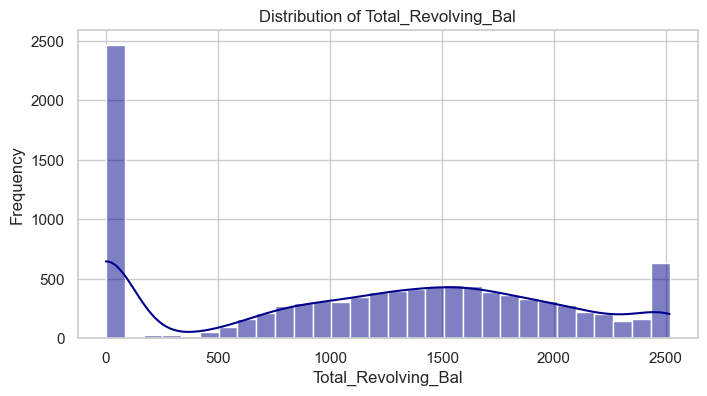

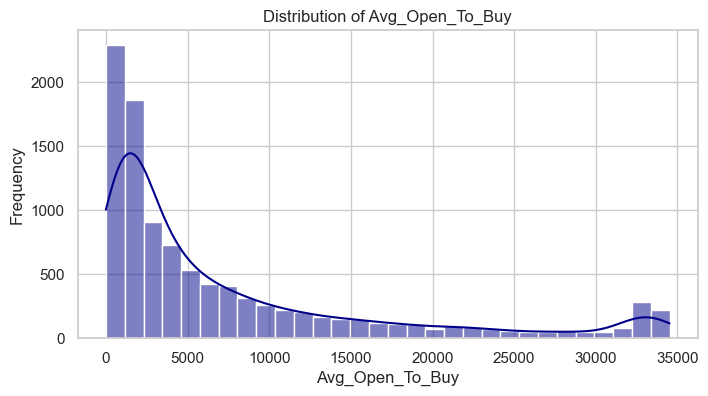

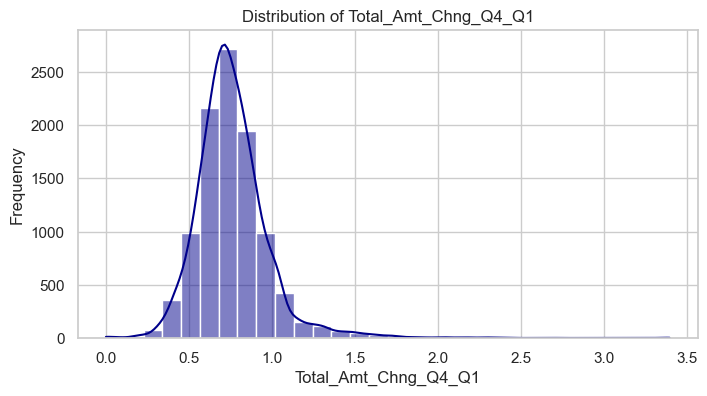

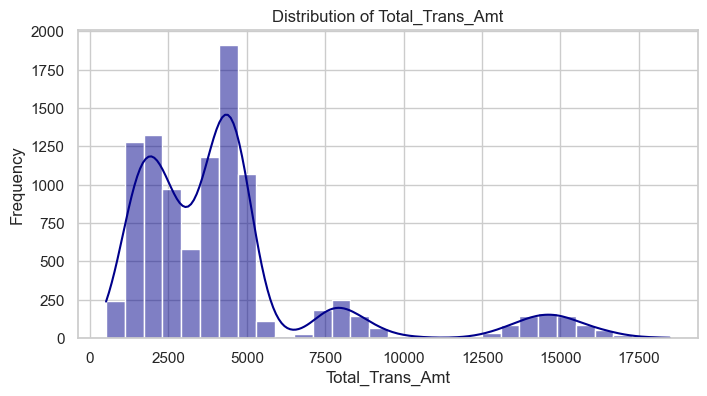

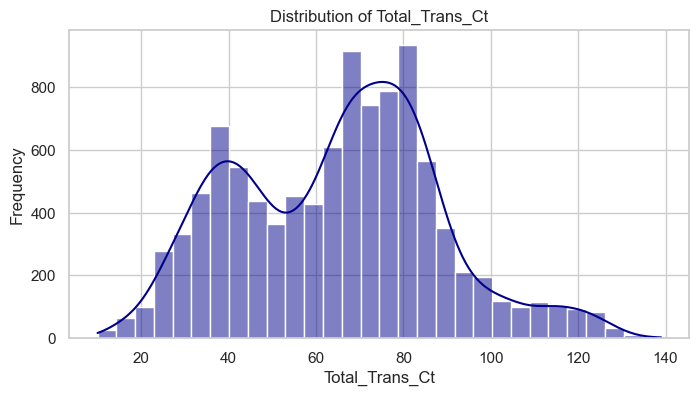

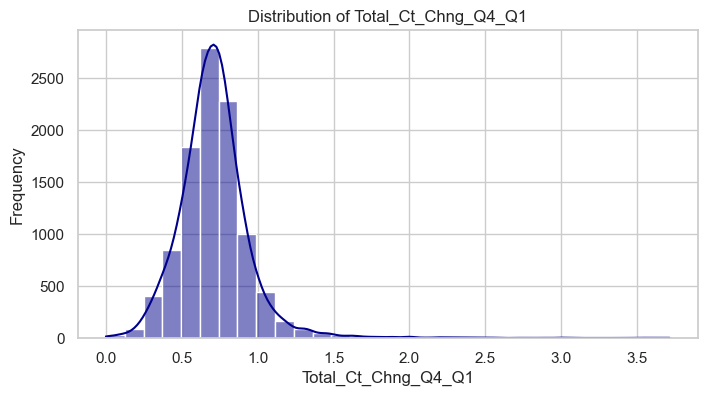

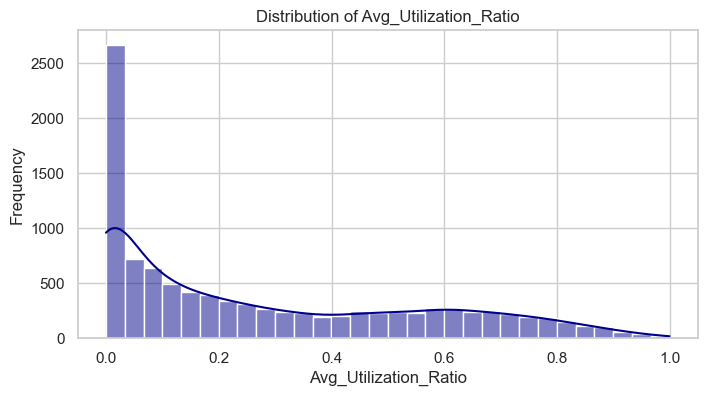

In [16]:
# List of numeric columns to analyze
numeric_columns = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Credit_Limit',
    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

# Loop through each numeric column and plot the distribution
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='darkblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [17]:
# # List of categorical columns to analyze
# categorical_columns = [
#     'Attrition_Flag', 'Gender', 'Education_Level',
#     'Marital_Status', 'Income_Category', 'Card_Category'
# ]

# # Loop through each categorical column and plot count distributions
# for col in categorical_columns:
#     plt.figure(figsize=(8, 4))
#     sns.countplot(x=col, data=df, palette="viridis")
#     plt.title(f'Count of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
#     plt.show()

<Axes: xlabel='Card_Category'>

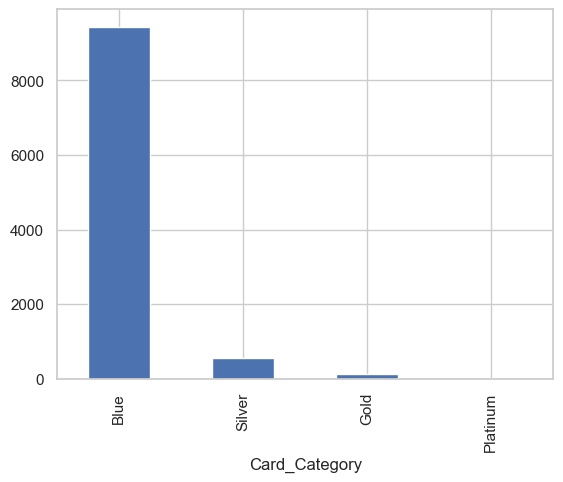

In [18]:
df.Card_Category.value_counts().plot(kind='bar')

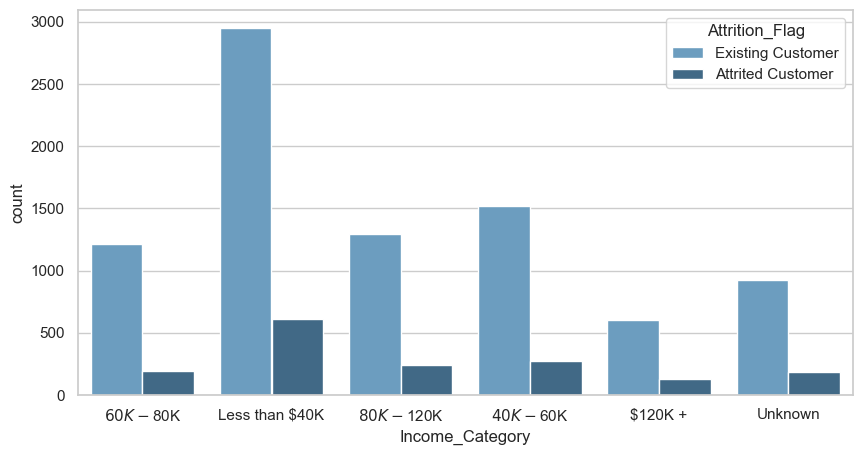

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='Income_Category',data=df,palette='Blues_d',hue='Attrition_Flag');

In [20]:
print(df['Gender'].value_counts())
print(df['Income_Category'].value_counts())
print(df['Education_Level'].value_counts())
print(df['Marital_Status'].value_counts())

Gender
F    5358
M    4769
Name: count, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


# **Categorical Data**

In [21]:
gender_counts = df.groupby(['Attrition_Flag', 'Gender']).size().reset_index(name='counts')
total_counts = df.groupby('Attrition_Flag').size().reset_index(name='total_counts')
percentages = pd.merge(gender_counts, total_counts, on='Attrition_Flag')
percentages['percentage'] = percentages['counts'] / percentages['total_counts'] * 100
percentages = percentages.sort_values(by='total_counts', ascending=False)

bar_data = go.Bar(
    x=percentages['Attrition_Flag'], 
    y=percentages['percentage'], 
    text=percentages['Gender'],
    opacity=0.75,
    marker=dict(color=percentages['Gender'].map({'M': 'blue', 'F': 'purple'}))
)

fig = go.Figure(data=[bar_data])

fig.update_layout(
    title="Percentage by Attrition Flag and Gender",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white'),
    xaxis_title="",
    yaxis_title="Percentage (%)",
    width=500,
    height=500
)

# pio.write_image(fig=fig, file="Gender.png", format='png')
fig.show()

In [22]:
counts = df.groupby(['Attrition_Flag', 'Education_Level']).size().reset_index(name='counts')
percentages = pd.merge(counts, total_counts, on='Attrition_Flag')
percentages['percentage'] = percentages['counts'] / percentages['total_counts'] * 100
percentages = percentages.sort_values(by='total_counts', ascending=False)

fig = px.bar(
    percentages, 
    x='Attrition_Flag', 
    y='percentage', 
    color='Education_Level', 
    barmode='group',
    opacity=0.75
    # text='percentage'
)

fig.update_layout(
    title="Percentage by Attrition Flag and Education Level",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white'),
    xaxis_title="",
    yaxis_title="Percentage (%)",
    legend_title_text='Education Level',
    width=600,
    height=500
)

# pio.write_image(fig=fig, file="Education_Level.png", format='png')
fig.show()

In [23]:
counts = df.groupby(['Attrition_Flag', 'Income_Category']).size().reset_index(name='counts')
percentages = pd.merge(counts, total_counts, on='Attrition_Flag')
percentages['percentage'] = percentages['counts'] / percentages['total_counts'] * 100
percentages = percentages.sort_values(by='total_counts', ascending=False)
percentages['Income_Category_Clean'] = percentages['Income_Category'].replace({
    '$120K +': 'Above 120K',
    '$40K - $60K': '40K to 60K', 
    '$60K - $80K': '60K to 80K',
    '$80K - $120K': '80K to 120K',
    'Less than $40K': 'Less than 40K',
    'Unknown': 'Unknown'
})

fig = px.bar(
    percentages, 
    x='Attrition_Flag', 
    y='percentage', 
    color='Income_Category_Clean', 
    barmode='group',
    opacity=0.75
    # text='percentage'
)

fig.update_layout(
    title="Percentage by Attrition Flag and Income Category",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white'),
    xaxis_title="",
    yaxis_title="Percentage (%)",
    legend_title_text='Income Category',
    width=600,
    height=500
)

# pio.write_image(fig=fig, file="Income_Category.png", format='png')
fig.show()

In [24]:
counts = df.groupby(['Attrition_Flag', 'Card_Category']).size().reset_index(name='counts')
percentages = pd.merge(counts, total_counts, on='Attrition_Flag')
percentages['percentage'] = percentages['counts'] / percentages['total_counts'] * 100
percentages = percentages.sort_values(by='total_counts', ascending=False)

fig = px.bar(
    percentages, 
    x='Attrition_Flag', 
    y='percentage', 
    color='Card_Category', 
    barmode='group',
    opacity=0.75
    # text='percentage'
)

fig.update_layout(
    title="Percentage by Attrition Flag and Card Category",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white'),
    xaxis_title="",
    yaxis_title="Percentage (%)",
    legend_title_text='Card Category',
    width=600,
    height=500
)

# pio.write_image(fig=fig, file="Card_Category.png", format='png')
fig.show()

**By looking at the Grouped Bar Charts, we can see how the data is distributed across different variables. The y-axis in above charts represents relative frequency (percentage) rather than raw counts, to accomodate the imbalanced dataset. If we use counts on the y-axis, the bars of existing customer will always look taller than the bars of attrited customer. By contrast, setting the y-axis to relative frequency allows for an apples-toapples comparison.**

In [25]:
#define new features
new_feature = ['Attrition_Flag', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

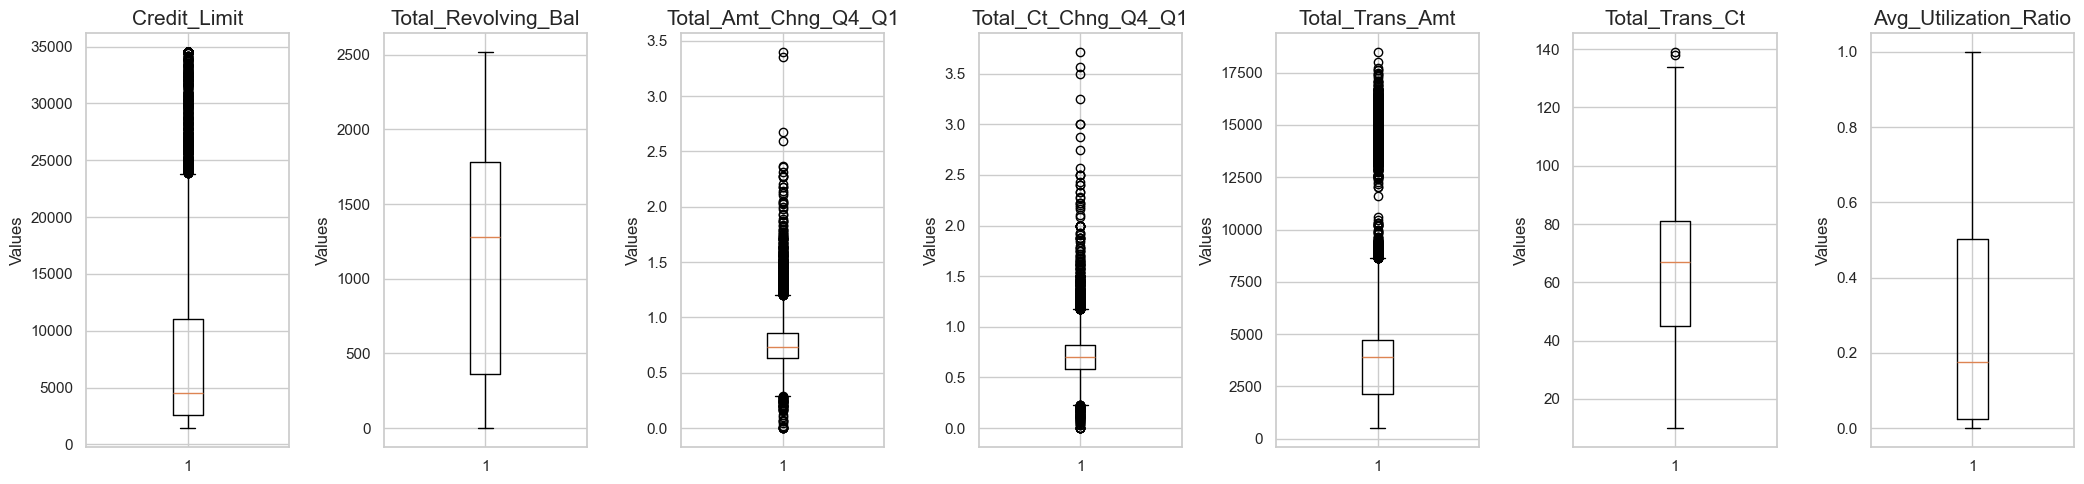

In [26]:
dff = df
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(7 * 3, 5))

for i, column in enumerate(new_feature[1:]):
    #Boxplot
    ax[i].boxplot(dff[column])
    # Set the title and labels
    ax[i].set_title(f'{column}', fontsize=15)
    ax[i].set_ylabel('Values')
    
# Adjust spacing between subplots
plt.tight_layout()
    
# Display the plots
plt.show()

###  Based on the boxplots, we can observe the presence of outliers as values lying beyond the whiskers. Notably, certain features like **Credit_Limit**, **Total_Amt_Chng_Q4_**, and    **Total_Trans_Amt** exhibit a considerable number of extreme values. Removing these outliers could result in a significant reduction of data.

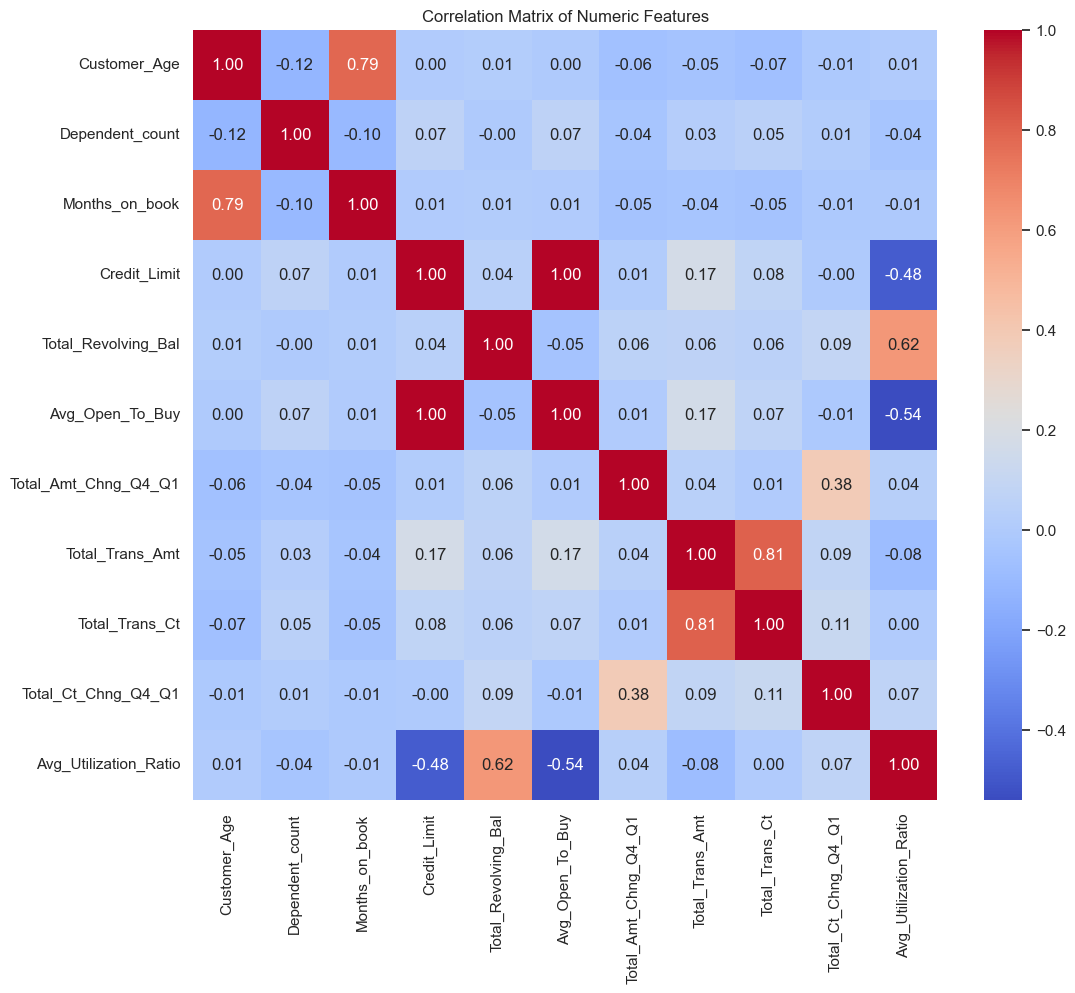

In [27]:
# Compute the correlation matrix for numeric features
corr_matrix = df[numeric_columns].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of the attrition flag variable')

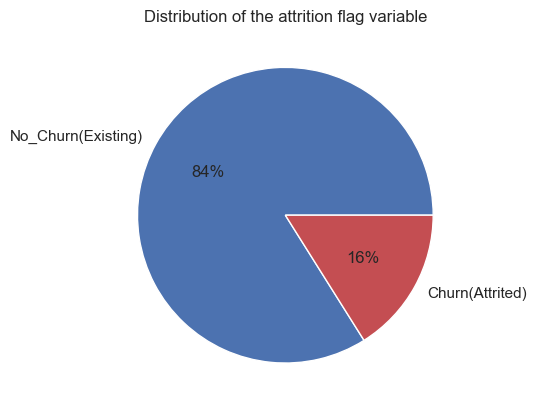

In [28]:
print(df['Attrition_Flag'].value_counts())
plt.pie(df['Attrition_Flag'].value_counts(), labels = ['No_Churn(Existing)','Churn(Attrited)'], autopct='%.0f%%', colors= 'br')
plt.title("Distribution of the attrition flag variable")

In [29]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({
    'Attrited Customer': 1,
    'Existing Customer': 0
})

In [30]:
df[df["Attrition_Flag"] == 1].shape[0]/df.shape[0]*100

16.065962279055988

# **Customer Attrition Analysis**

**Highly Imbalanced Target Variable:**
- 83.9% of customers are Existing Customers.
- 16.1% of customers are Attrited Customers (churned).

**Potential Issue:**
- The dataset is imbalanced, meaning a model might be biased towards predicting "Existing Customer."


**As its mentioned That last two columns should not be used so we are removing those columns.**

In [31]:
df.drop(columns=["CLIENTNUM",
                 "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],
inplace=True)

In [32]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [33]:
fig = px.scatter(df, x="Customer_Age", y="Months_on_book",
                labels={
                    "Customer_Age": "Age",
                    "Months_on_book": "Months"
                })

fig.update_layout(
    title="Preiod of Relationship with Bank",
    plot_bgcolor='rgba(32, 32, 32, 0)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white'),
    xaxis_title="Customer Age",
    yaxis_title="Months",
    legend_title_text='Age',
    width=600,
    height=500
)

# pio.write_image(fig=fig, file='Months_on_book.png', format='png')
fig.show()

**Customers who are older are more likely to have a longer period of relationship with the bank. It may prompts us to ponder why we rarely see an older individuals initiating new bank relationships. The bank does not get any old individuals as new customers. There are questions we can see, let's say For instance, could this trend be because older individuals have fewer needs for new credit services, or might it reflect a preference for sticking with familiar credit services over chaning into new ones?**

**Another thing that is, the horizontal line at the 36-month mark. This line implies some people stop their credit card after 3 years of usage. May be, there can be things related to the 3-year mark, such as the expiration of a promotion or a common loan term**

In [34]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [35]:
object_columns = df.select_dtypes(include="object").columns

In [36]:
print(object_columns)

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


### **Potential Risks in the Credit Score Prediction Model & Mitigation Strategies**

The **Random Forest-based Credit Score Prediction Model** faces several key risks, including **bias, data quality issues, adversarial attacks, and explainability concerns**. Below are the major risks and ways to mitigate them:

### **1. Data Imbalance Risk**
- **Risk:** The dataset may have more "Good" credit scores than "Bad" ones, leading to a bias where the model favors the majority class.
- **Mitigation:**
    - Use **SMOTE (Synthetic Minority Over-sampling Technique)** to balance classes.
    - Use **class weighting** in Random Forest (`class_weight="balanced"`) to penalize misclassification of minority classes.

### **2. Bias & Fairness Risk**
- **Risk:** Certain demographic groups (e.g., income level, gender, education) may be unfairly penalized by the model, leading to **discriminatory predictions**.
- **Mitigation:**
    - Use **adversarial debiasing** or **reweighting** strategies to ensure fairness.
    - Implement **Equalized Odds** to ensure similar error rates across groups.
    - Use **SHAP (SHapley Additive Explanations)** to check if features like "Gender" disproportionately influence predictions.

### **3. Overfitting Risk**
- **Risk:** The model may memorize patterns in training data rather than learning generalizable trends, leading to poor performance on unseen data.
- **Mitigation:**
    - Use **cross-validation** (`cv=5`) to validate performance across multiple subsets.
    - Limit tree depth (`max_depth=10`) and reduce the number of trees (`n_estimators=200`) to prevent overfitting.
    - Use **feature selection** (drop highly correlated or redundant features).

### **4. Feature Leakage Risk**
- **Risk:** Some features may contain future information that is unavailable at the time of prediction, artificially inflating accuracy.
- **Example:** Using `Total_Trans_Amt` (total transaction amount) as a predictor when it is a result of credit behavior.
- **Mitigation:**
    - Perform **feature importance analysis** to detect and remove potential leaky features.
    - Use **only features available at loan application time**.

### **5. Adversarial Attacks & Fraud Risk**
- **Risk:** Attackers may manipulate input data (e.g., **falsify income or credit utilization**) to get favorable predictions.
- **Mitigation:**
    - Implement **anomaly detection** to flag suspicious inputs.
    - Use **adversarial training** to simulate and defend against attacks.
    - Apply **robust scaling and noise injection** to make the model less sensitive to small manipulations.

### **6. Model Explainability Risk**
- **Risk:** Random Forest models are harder to interpret than simple linear models, making it difficult for financial analysts to trust predictions.
- **Mitigation:**
    - Use **SHAP values** to explain which features impact predictions.
    - Generate **counterfactual explanations** (e.g., "If your credit utilization was 10% lower, your score would increase").
    - Provide a **fairness report** alongside predictions to detect disparities.


## Feature Engineering & Transformation